
🚩First 10 rows : 

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   
5  33    Male  29.0           Pune    Student                2.0   
6  52    Male  30.0          Thane    Student                3.0   
7  56  Female  30.0        Chennai    Student                2.0   
8  59    Male  28.0         Nagpur    Student                3.0   
9  62    Male  31.0         Nashik    Student                2.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 

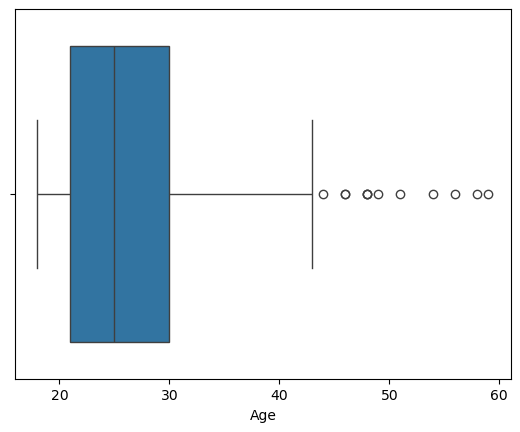

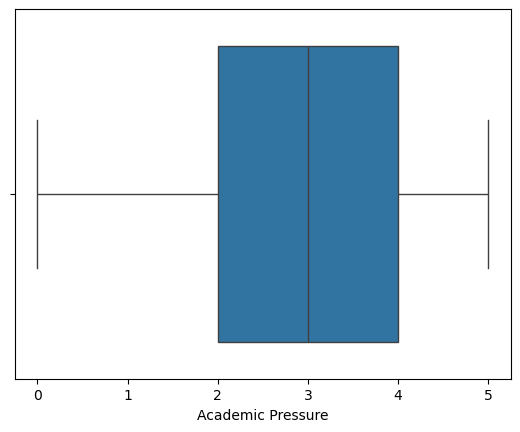

ValueError: Could not interpret value `Work Pressure` for `x`. An entry with this name does not appear in `data`.

In [23]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import os


df = pd.read_csv('student_depression_dataset.csv')

def show_data(df):
    # First 10 rows
    print("\n🚩First 10 rows : \n")
    print(df.head(10))
    print()

    # Last 10 rows 
    print("\n🚩last 10 rows : \n")
    print(df.tail(10))
    print()

    # Data frame info
    print('\n📌Data fram info : \n')
    print(df.info())
    print()
show_data(df)
def describe_df(df):
    # Describe of numerical columns
    print('\n📌Describe of numerical columns : \n')
    print(df.describe().T)
    print()

    # Describe of catgorical columns
    print('\n📌Describe of catgorical columns : \n')
    print(df.describe(include = "O").T)
    print()
describe_df(df)
df.drop("id", axis = 1 , inplace = True)
df = df.drop(columns=['Job Satisfaction', 'Work Pressure'])
df['Financial Stress'].unique()
# حذف الصفوف اللي قيمتها ؟ في العمود
df = df[df['Financial Stress'] != '?']
df['Financial Stress'].unique()
df['Financial Stress'] = df['Financial Stress'].astype(float)
df['Sleep Duration'].unique()
df = df[df['Sleep Duration'] != 'Others']

print("Duplicates = ",df.duplicated().sum())

def missing_values(df):
    print("\n🔍 Null values ratio per column:\n\n")
    for col in df.columns :
        print(f"Column : {col}")
        print(f"Missing values count = {df[col].isna().sum()}")
        print(f"Missing % = {(df[col].isna().sum()/len(df))*100}")
        print("="*50 + '\n')
missing_values(df)



def check_uniques(df):        
# Check the unique values in  columns  
    print('\n📌Check the unique values in  columns : \n')
    for col in df.columns :
        print(f'column : {col}')
        print(df[col].value_counts().head(30)) # preview top 10 unique values with count 
        print(f"\ncount of values :{len(df[col].unique())}") # preview the count of unique values
        print("="*50 + "\n")

check_uniques(df)   

print(df['Degree'].unique())
degree_mapping = {
    

    # Bachelor level
    "'Class 12'": "Bachelor",
    "BSc": "Bachelor",
    "BA": "Bachelor",
    "BCA": "Bachelor",
    "B.Ed": "Bachelor",
    "BHM": "Bachelor",
    "B.Pharm": "Bachelor",
    "BE": "Bachelor",
    "B.Com": "Bachelor",
    "B.Arch": "Bachelor",
    "B.Tech": "Bachelor",
    "BBA": "Business",

    # Master level
    "M.Tech": "Master",
    "MSc": "Master",
    "MA": "Master",
    "M.Ed": "Master",
    "MHM": "Master",
    "M.Pharm": "Master",
    "MCA": "Master",
    "MBA": "Master",
    "M.Com": "Master",
    "ME": "Master",
    "MD": "Master",

    # Others
    "MBBS": "Others",
    "LLB": "Others",
    "LLM": "Others",
    "PhD": "Others",
    "Others": "Others"
}
df['Degree'] = df['Degree'].map(degree_mapping)
df['Degree'].unique()

df["GPA"] = df["CGPA"] * 0.4
df.drop("CGPA",axis = 1 , inplace = True)

def outliers_Checking(df):
    # check numerical columns to know how i handling
    numeric_columns = [ 'Age', 'Academic Pressure','Work Pressure','Study Satisfaction','Work/Study Hours']
    print('\n📌Boxplt for Numerical columns\n\n')
    for col in numeric_columns :
        sns.boxplot(data = df , x = col) # boxplot figer
        plt.show()
    print()
    print()


    # check outlier percentage in num columns
    print("\n🔍 outlier values ratio per column:\n\n")
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"Column: {col}")
        print(f"Number of outliers: {len(outliers)}")
        print(f'percentage of outlier = {(len(outliers)/len(df))*100}')
        print("-" * 20)
    print()
    print()

outliers_Checking(df)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# df = remove_outliers(df, "Age")
df = remove_outliers(df, "Age")

#df = remove_outliers(df, "Work Pressure")
df = remove_outliers(df, "Work Pressure")


print(df)


In [6]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,GPA
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,Bachelor,Yes,3.0,1.0,No,1,3.588
1,Female,24.0,Bangalore,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,Bachelor,No,3.0,2.0,Yes,0,2.360
2,Male,31.0,Srinagar,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,Bachelor,No,9.0,1.0,Yes,0,2.812
3,Female,28.0,Varanasi,Student,3.0,0.0,2.0,0.0,'7-8 hours',Moderate,Bachelor,Yes,4.0,5.0,Yes,1,2.236
4,Female,25.0,Jaipur,Student,4.0,0.0,3.0,0.0,'5-6 hours',Moderate,Master,Yes,1.0,1.0,No,0,3.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.0,0.0,'5-6 hours',Unhealthy,High School,Yes,7.0,1.0,Yes,0,2.300
27897,Male,27.0,Ludhiana,Student,2.0,0.0,3.0,0.0,'Less than 5 hours',Healthy,Master,No,0.0,3.0,Yes,0,3.760
27898,Male,31.0,Faridabad,Student,3.0,0.0,4.0,0.0,'5-6 hours',Unhealthy,Medical,No,12.0,2.0,No,0,2.644
27899,Female,18.0,Ludhiana,Student,5.0,0.0,2.0,0.0,'Less than 5 hours',Healthy,High School,Yes,10.0,5.0,No,1,2.752


In [ ]:
df.to_csv('studet_depression', index=False)


array(['1.0', '2.0', '5.0', '3.0', '4.0'], dtype=object)

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'"], dtype=object)

array([1., 2., 5., 3., 4.])